In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

from tqdm import tqdm
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

import pickle
import os

import datetime

C:\Users\Public\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#Loading the dataframe using pickle.
with open('finaldata.pkl', 'rb') as f: 
    final = pickle.load(f)

In [4]:
final.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read nice rhythm well good re...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...


In [3]:
# We will visualise only 10k reviews.
# Taking 5k positive reviews and 5k negative reviews from the Final cleaned dataset.
final_positive = final[final['Score']==1]
final_negative = final[final['Score']==0]
positive_subset = final_positive.sample(5000)
negative_subset = final_negative.sample(5000)

# Merging both the dataframes. 
subset = pd.concat([positive_subset,negative_subset])
score = subset["Score"].values


In [31]:
score.shape

(10000,)

## Bag of words

In [32]:
count_vec = CountVectorizer()
bag_count = count_vec.fit_transform(subset['CleanedText'])
row,col = bag_count.shape

(10000, 13511)

In [7]:
# Because of not enough Ram, visualising a sparse matrix will give us a memory error. 
# Using TruncatedSVD to reduce the number of dimensions.
svd = TruncatedSVD(n_components=400, n_iter=7, random_state=42)
bow_svd = svd.fit_transform(bag_count)
print(bow_svd.shape) 

# Amount of variance stored
print(sum(svd.explained_variance_ratio_))

(10000, 400)
0.7225561571725841


In [8]:
# Standardising the data before visualization.
standard_bow = StandardScaler().fit_transform(bow_svd)
standard_bow.shape

(10000, 400)

### t-SNE (Bag of Words)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.387s...
[t-SNE] Computed neighbors for 10000 samples in 88.993s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.095170
[t-SNE] KL divergence after 250 iterations with early exaggeration: 113.375389
[t-SNE] Error after 1000 iterations: 4.113067
2018-11-21 03:45:23.736725


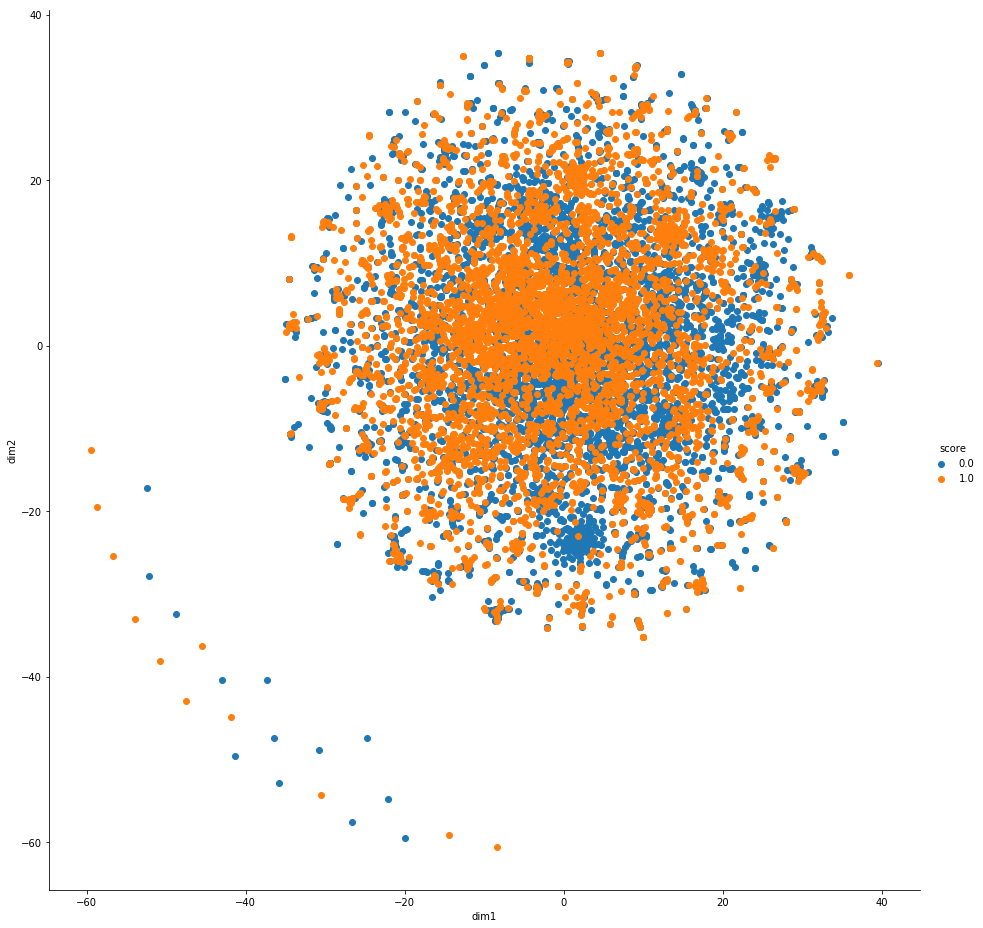

In [13]:
model = TSNE(n_components=2, random_state=0, perplexity=40, verbose=1)
tsne_data = model.fit_transform(standard_bow)

# Adding another dimension(column) to tsne_data.
tsne_data = np.hstack((tsne_data,score[:,np.newaxis]))

tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

sns.FacetGrid(tsne_df, hue="score", height=13).map(plt.scatter, 'dim1', 'dim2').add_legend()
print(datetime.datetime.now())




## TF-IDF

In [7]:
# TF-IDF function.
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(subset['CleanedText'].values)

In [8]:
# Using TruncatedSVD to reduce the number of dimensions.
svd = TruncatedSVD(n_components=1500, n_iter=7, random_state=42)
tfidf_svd = svd.fit_transform(final_tf_idf)

In [9]:
print(sum(svd.explained_variance_ratio_))

0.7813020146957833


In [10]:
standard_tfidf = StandardScaler().fit_transform(tfidf_svd)
standard_tfidf.shape

(10000, 1500)

### t-SNE (Tf-Idf)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.605s...
[t-SNE] Computed neighbors for 10000 samples in 549.915s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 10.336031
[t-SNE] KL divergence after 250 iterations with early exaggeration: 170.311584
[t-SNE] Error after 1000 iterations: 4.656920


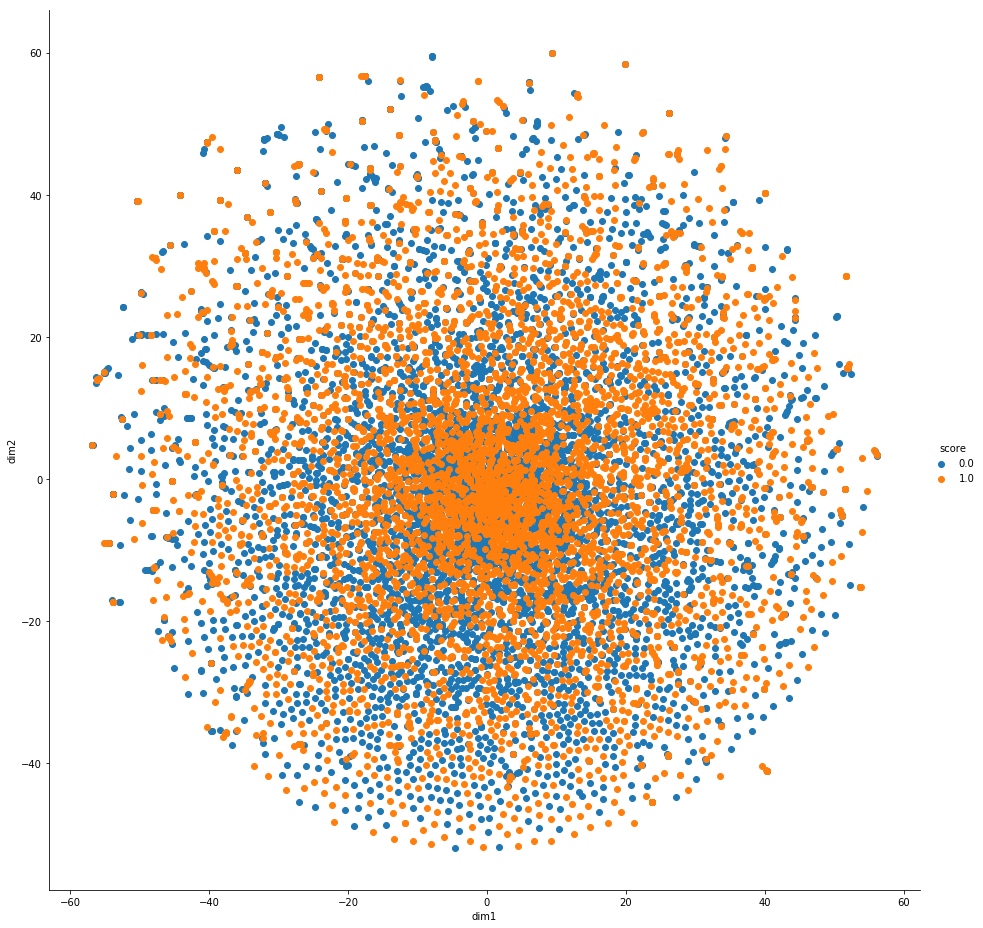

In [12]:
model = TSNE(n_components=2, random_state=0, perplexity=40, verbose=1)
tsne_data = model.fit_transform(standard_tfidf)
tsne_data = np.hstack((tsne_data,score[:,np.newaxis]))
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

sns.FacetGrid(tsne_df, hue="score", height=13).map(plt.scatter, 'dim1', 'dim2').add_legend()

## Averge Word To Vector

In [7]:
i=0
list_of_sentences=[]
for sent in subset['CleanedText'].values:
    list_of_sentences.append(sent.split())

In [9]:
w2v_model=Word2Vec(list_of_sentences,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [65]:
sent_vectors = []
for sentence in tqdm(list_of_sentences): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sentence: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors.append(sent_vec)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:13<00:00, 719.09it/s]


## t-SNE (Average Word to Vector)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.037s...
[t-SNE] Computed neighbors for 10000 samples in 15.461s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.255132
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.353828
[t-SNE] Error after 1000 iterations: 2.260478
2018-11-21 16:34:37.860655


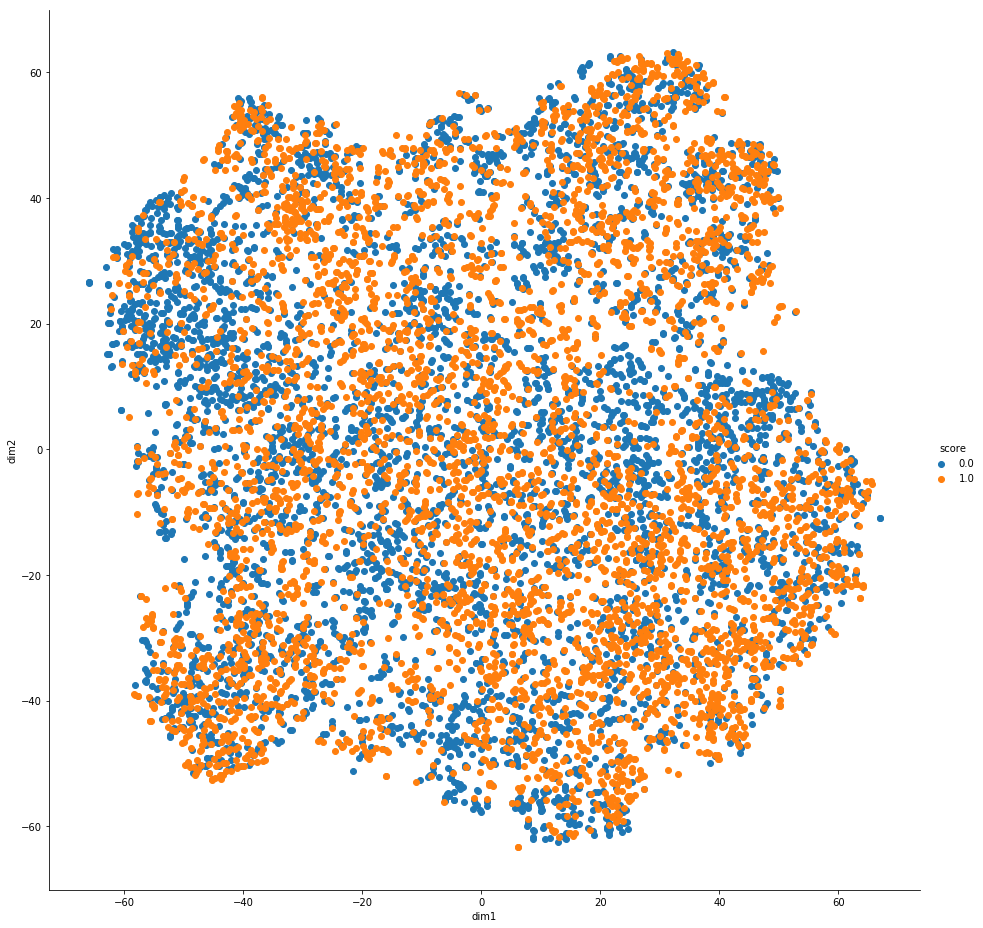

In [74]:
model = TSNE(n_components=2, random_state=0, perplexity=40, verbose=1)
tsne_data = model.fit_transform(sent_vectors)
tsne_data = np.hstack((tsne_data,score[:,np.newaxis]))
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

sns.FacetGrid(tsne_df, hue="score", height=13).map(plt.scatter, 'dim1', 'dim2').add_legend()
print(datetime.datetime.now())


# Tfidf and Average word to vector

In [4]:
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(subset['CleanedText'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [10]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentences): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:17<00:00, 581.45it/s]


## Tsne (Tfidf-AvgWord2vec)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.048s...
[t-SNE] Computed neighbors for 10000 samples in 15.137s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.268689
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.170700
[t-SNE] Error after 1000 iterations: 2.126873
2018-11-25 15:33:04.510322


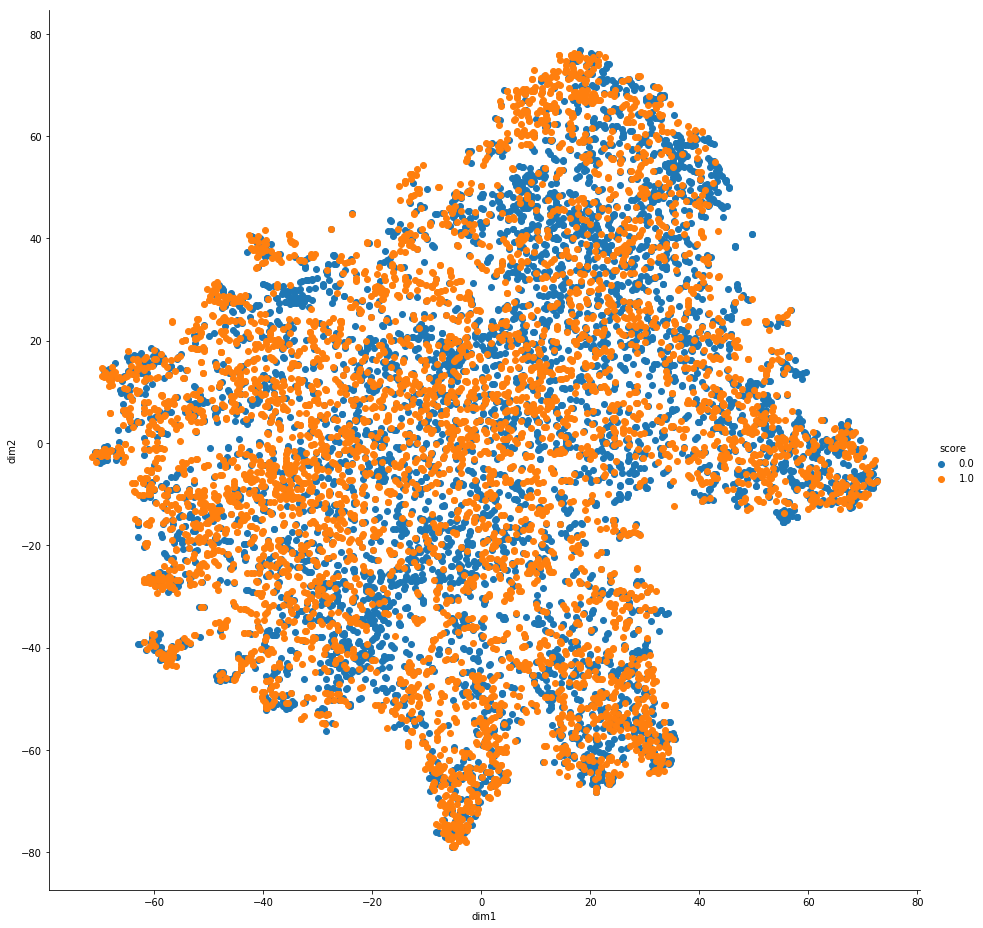

In [11]:
model = TSNE(n_components=2, random_state=0, perplexity=40, verbose=1)
tsne_data = model.fit_transform(tfidf_sent_vectors)
tsne_data = np.hstack((tsne_data,score[:,np.newaxis]))
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

sns.FacetGrid(tsne_df, hue="score", height=13).map(plt.scatter, 'dim1', 'dim2').add_legend()
print(datetime.datetime.now())


# Observations
We can observe many overlapping points in the plots. Hence, we can make no conclusion about the visualisation of the Amazon-fine-food Reviews data.